In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
# generate dataset from y = 2 + 3x
def sim_data(N = 500, b0 = 2, b1 = 3):
    x = np.random.uniform(-2, 2, size=(N, 1))
    e = np.random.normal(0, 4, size=(N, 1))
    y = b0 + b1 * x + e  # y = 2x + 3 + E
    return x, y

In [1]:
# helper to create array of models
def make_models(alpha):
    return [LinearRegression(fit_intercept=True, normalize=True), 
            Ridge(fit_intercept=True, alpha=alpha, normalize=True, solver="saga"),
            Lasso(fit_intercept=True, alpha=alpha, normalize=True)]

# helper to generate data, fit models, cache results and return 
def do_pred(n=1000, alpha=0.5):
    models = make_models(alpha=alpha)
    coefs = np.zeros(shape=(n, len(models)))
    intercepts = np.zeros(shape=(n, len(models)))
    # for n iters, simulate data, fit model, get coeffs
    for i in range(n):
        X, y = sim_data()
        for idx, model in enumerate(models):
            model.fit(X, y)
            coefs[i, idx] = float(model.coef_)
            intercepts[i, idx] = float(model.intercept_)
    return coefs, intercepts

# helper to plot, c is the coefficient array of size (N x 3)
def show_plot(c, alpha, filename=None):
    plt.figure(figsize=(10, 5))
    
    # plot sampling distribution, colors from color brewer
    plt.hist(c[:, 0], label="OLS", alpha=0.5, bins=50, color="#2ca25f")
    plt.hist(c[:, 1], label="Ridge", alpha=0.5, bins=50, color="#e6550d")
    plt.hist(c[:, 2], label="Lasso", alpha=0.5, bins=50, color="#3182bd")
    
    # plot means of estimators 
    _means = np.mean(c, axis=0)
    plt.vlines(x=_means, ymin=0, ymax=80, linestyles="dashed", linewidth=2,
               colors=["#006d2c", "#a63603", "#08519c"])
    
    # check if this example is fabricated
    if alpha == "FAKE":
        plt.title("Fabricated sampling distributions")
    else:
        plt.title("Sampling distribution of estimated beta at lambda = {0}".format(alpha))
        
    # save plot to file
    if filename:
        plt.savefig(filename)

    # final touches
    plt.ylim(0, 80)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

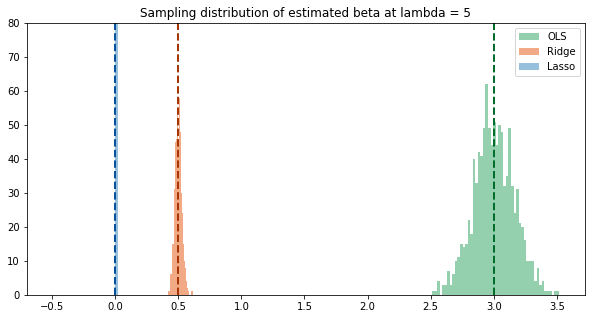

In [167]:
alpha, fname = 5, "l_5"
coeffs, intercepts = do_pred(alpha = alpha)
show_plot(coeffs, alpha, fname)

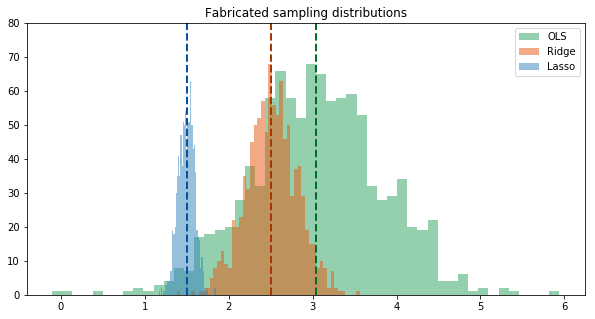

In [171]:
ols_fake = np.random.normal(3, 0.8, size=1000)
ridge_fake = np.random.normal(2.5, 0.3, size=1000)
lasso_fake = np.random.normal(1.5, 0.1, size=1000)
fake_data = np.column_stack((ols_fake, ridge_fake, lasso_fake))
show_plot(fake_data, "FAKE", "fabricated")